# Lexicometry analysis

## Analyze vocabulary richness

Analyze vocabulary richess (as defined in the famous Pauline paper) and TTR for the different acts.

In [52]:
from math import log
from statistics import fmean, median
import numpy as np 


def compute_vocabulary_richness(book_content):
    """Compute the the vocabulary richess of a book."""
    full_text = ""
    word_types = []
    word_instances = []
    for content in book_content:
        word_types.append(content["lemma"].lower())
        word_instances.append(content["raw"].lower())
    try:
        return len(set(word_types))/len(word_instances)
    except ValueError:
        return 0


def compute_token_ratio(book_content, window=250):
    """Compute the the vocabulary richess of a book."""
    maximum = round(len(book_content)/window)
    if maximum == 0:
        maximum = 1
    ix=0
    ttrs = []
    while ix*window <= maximum:
        try:
            ttrs.append(
                len(set([word["lemma"].lower() for word in book_content[ix*window:(ix+1)*window]]))/len(([word["raw"].lower() for word in book_content[ix*window:(ix+1)*window]]))
            )
        except ZeroDivisionError:
            ttrs.append(np.nan)
        ix += 1
    return round(fmean(ttrs), 2)


def compute_sentence_richness(book_content):
    """Compute the sentence richness.
    """
    ttrs = []
    sentence = book_content.replace("·", ".").replace(";",".").split(".")
    for sub_sentence in sentence:
        if len(sub_sentence.split()):
            ttrs.append(len(set(sub_sentence.split()))/len(sub_sentence.split()))
    return round(fmean(ttrs), 2)


def compute_sentence_length(book_content):
    """Compute the mean sentence lenght in a text.
    """
    sentence_lengths = []
    sentence = book_content.replace("·", ".").replace(";",".").split(".")
    for sub_sentence in sentence:
        if len(sub_sentence.split()):
            sentence_lengths.append(len(sub_sentence.split()))
    return round(median(sentence_lengths), 2)

In [46]:
import json

text = json.load(open("../data/cleaned/cleaned_texts.json", "r"))

In [47]:
import pandas as pd

ttr = {}
for text_name, content in text.items():
    ttr[text_name] = compute_token_ratio(content, window=500)

ttrs = pd.DataFrame.from_dict(ttr, orient="index")
ttrs.columns = ["TTR"]

## Analyze sentence complexity

In [ ]:
import pandas as pd


full_lemmatized_content = {}

for text_title, text_content in text.items():
    full_lemmatized_content[text_title] = " "
    for content in text_content:
        full_lemmatized_content[text_title] += content["lemma"] + " "


compute_sentence_richness_ = {}
for text_name, content in full_lemmatized_content.items():
    compute_sentence_richness_[text_name] = compute_sentence_richness(content)


compute_sentence_length_ = {}
for text_name, content in full_lemmatized_content.items():
    compute_sentence_length_[text_name] = compute_sentence_length(content)


SR = pd.DataFrame.from_dict(compute_sentence_richness_, orient="index").sort_values(by=0)
SR.columns = ["Sentence Vocabulary Richness"]

SL = pd.DataFrame.from_dict(compute_sentence_length_, orient="index").sort_values(by=0)
SL.columns = ["Median Sentence length"]

In [58]:
df = pd.concat([ttrs, SR, SL], axis=1)

In [59]:
print(df.sort_values(by="TTR").to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrr}
\toprule
 & TTR & Sentence Vocabulary Richness & Median entence length \\
\midrule
AndrMattBon & 0.33 & 0.88 & 11.00 \\
AndrMattTisch1115 & 0.34 & 0.83 & 14.00 \\
AndrMattTisch & 0.34 & 0.83 & 17.00 \\
AndrMattBon1115 & 0.34 & 0.87 & 10.00 \\
MartAndrBonTert & 0.40 & 0.86 & 16.00 \\
PAndr1 & 0.41 & 0.90 & 12.00 \\
MartAndrBonPrius & 0.42 & 0.88 & 9.00 \\
ActAndrPrieur & 0.42 & 0.89 & 11.00 \\
ActAndrBon & 0.42 & 0.92 & 9.00 \\
PAndr2 & 0.43 & 0.85 & 17.00 \\
MartAndrPrieurB & 0.46 & 0.88 & 11.00 \\
MartAndrBonAlt & 0.47 & 0.90 & 10.00 \\
MartAndrPrieurA & 0.48 & 0.89 & 11.00 \\
\bottomrule
\end{tabular}



## Analyze most frequent words

## Analyze words that are unique to each text

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
full_lemmatized_content = {}

for text_title, text_content in text.items():
    full_lemmatized_content[text_title] = " "
    for content in text_content:
        full_lemmatized_content[text_title] += content["lemma"] + " "

In [26]:
full_lemmatized_content

{'AndrMattTisch1115': " καί ἀποκρίνω ᾿ανδρέας λέγω ναί , ἀδελφός , ποιέω καί ἐνώπιον ὁ ἀρχιερεύς , οὐ μόνος ἐν φανερός ἀλλά καί ἐν κρυπτός , καί οὐ πιστεύω αὐτός . ἀποκρίνω δέ ὁ ἰησοῦς λέγω ποῖος εἰμί ὁ δύναμις ὅς ποιέω ἐν ὁ κρυπτός ; φανέρωσός ἐγώ αὐτός . καί ἀποκρίνω ᾿ανδρέας λέγω ὦ ἄνθρωπος ὁ ἔχω ὁ πνεῦμα ὁ ἐπερωτήσεως , τίς ἐγώ ἐκπειράζω ; καί ἀποκρίνω ὁ ἰησοῦς λέγω οὐ ἐκπειράζω σύ οὗτος λέγω , μαθητής ὁ λέγω ἰησός , ἀλλά χαίρω ὁ ψυχή ἐγώ καί ἀγάλλω , οὐ μόνος δέ ὁ ἐμός , ἀλλά καί πᾶς ψυχή ὁ ἀκούω ὁ θαυμάσιος ὁ ἰησός . καί ἀποκρίνω ᾿ανδρέας λέγω ω τέκνον , ὁ κύριος πληρόω σύ ὁ ψυχή πᾶς χαρά καί πᾶς ἀγαθός , καθώς ἔπεισάς ἐγώ νῦν ἵνα ἀναγγέλλω σύ ὁ σημεῖον ὅς ποιέω ὁ κύριος ἡμεῖς ἐν ὁ κρυπτός . εγίγνομαι πορεύομαι ἡμεῖς ὁ δώδεκα μαθητής μετά ὁ κύριος ἡμεῖς εἰς ἱερόν ὁ ἔθνος ἵνα γνωρίζω ἡμεῖς ὁ ἄγνοια ὁ διάβολος , καί θεάομαι ἡμεῖς ὁ ἀρχιερεύς ἀκολουθέω ὁ ἰησός λέγω ἡμεῖς ὦ ταλαίπωρος , πῶς περιπατέω μετά ὁ λέγω ὅτι υἱός εἰμί ὁ θεός ; μή ἔχω υἱός ὁ θεός ; τίς ἐκ ὑμεῖς ὁράω ὁ θεός ὁμι

In [71]:
count_vectorizer = CountVectorizer()

word_frequency = count_vectorizer.fit_transform(list(full_lemmatized_content.values()))

df = pd.DataFrame(word_frequency.todense(), columns=count_vectorizer.get_feature_names_out(), index=full_lemmatized_content.keys())

In [82]:
binary_df = df.gt(0).astype(int)
lemma_document_counts = binary_df.sum(axis=0)
total_document_counts = binary_df.sum(axis=1)
unique_lemmas = lemma_document_counts[lemma_document_counts == 1].index
unique_per_text = binary_df[unique_lemmas].sum(axis=1)

ratio_unique_per_text = unique_per_text/total_document_counts.values*100

AndrMattTisch1115     7.142857
AndrMattTisch        13.581599
MartAndrBonAlt        8.525346
MartAndrBonPrius      8.299866
PAndr2               28.294178
AndrMattBon          13.727561
PAndr1               22.938531
AndrMattBon1115       7.117438
ActAndrPrieur        32.314107
MartAndrPrieurB      13.080685
MartAndrBonTert      38.646288
MartAndrPrieurA      18.580645
ActAndrBon            4.341737
dtype: float64

In [94]:
[pd.DataFrame(unique_per_text), 
                      pd.DataFrame(ratio_unique_per_text)]

[                     0
 AndrMattTisch1115   20
 AndrMattTisch      124
 MartAndrBonAlt      37
 MartAndrBonPrius    62
 PAndr2             277
 AndrMattBon        130
 PAndr1             153
 AndrMattBon1115     20
 ActAndrPrieur      465
 MartAndrPrieurB    107
 MartAndrBonTert    531
 MartAndrPrieurA    144
 ActAndrBon          31,
                            0
 AndrMattTisch1115   7.142857
 AndrMattTisch      13.581599
 MartAndrBonAlt      8.525346
 MartAndrBonPrius    8.299866
 PAndr2             28.294178
 AndrMattBon        13.727561
 PAndr1             22.938531
 AndrMattBon1115     7.117438
 ActAndrPrieur      32.314107
 MartAndrPrieurB    13.080685
 MartAndrBonTert    38.646288
 MartAndrPrieurA    18.580645
 ActAndrBon          4.341737]

In [106]:
lemma_df = pd.concat([pd.DataFrame(unique_per_text), 
                      pd.DataFrame(ratio_unique_per_text)],
                      axis=1)
lemma_df.columns = ["Number", "Ratio"]
print(lemma_df.sort_values("Number").to_latex())

\begin{tabular}{lrr}
\toprule
 & Number & Ratio \\
\midrule
AndrMattTisch1115 & 20 & 7.142857 \\
AndrMattBon1115 & 20 & 7.117438 \\
ActAndrBon & 31 & 4.341737 \\
MartAndrBonAlt & 37 & 8.525346 \\
MartAndrBonPrius & 62 & 8.299866 \\
MartAndrPrieurB & 107 & 13.080685 \\
AndrMattTisch & 124 & 13.581599 \\
AndrMattBon & 130 & 13.727561 \\
MartAndrPrieurA & 144 & 18.580645 \\
PAndr1 & 153 & 22.938531 \\
PAndr2 & 277 & 28.294178 \\
ActAndrPrieur & 465 & 32.314107 \\
MartAndrBonTert & 531 & 38.646288 \\
\bottomrule
\end{tabular}



In [101]:
lemma_df

,0,0
AndrMattTisch1115,20,7.142857
AndrMattTisch,124,13.581599
MartAndrBonAlt,37,8.525346
MartAndrBonPrius,62,8.299866
PAndr2,277,28.294178
AndrMattBon,130,13.727561
PAndr1,153,22.938531
AndrMattBon1115,20,7.117438
ActAndrPrieur,465,32.314107
MartAndrPrieurB,107,13.080685


## Analyze distance in terms of words use of the texts

In [30]:
import numpy as np
from textdistance import jaccard

In [31]:
distance_matrix = np.zeros((len(full_lemmatized_content.values()), len(full_lemmatized_content.values())))

for ix, content_i in enumerate(list(full_lemmatized_content.values())):
    for jx, content_j in enumerate(list(full_lemmatized_content.values())):
        distance_matrix[ix, jx] = 1 - jaccard(content_i, content_j)

In [32]:
def plot_distance_matrix(ax, distance_matrix, title="Distance Matrix", cmap='flare', cbar=True, cbar_kws=None, **kwargs):
    """
    Plot a distance matrix as a heatmap.

    Parameters:
        distance_matrix (pd.DataFrame): Input distance matrix.
        title (str): Title of the plot.
        figsize (tuple): Figure size (width, height).
        cmap (str): Colormap for the heatmap.
        cbar (bool): Whether to display the colorbar.
        cbar_kws (dict): Additional arguments for the colorbar.
        **kwargs: Additional arguments passed to `sns.heatmap`.
    """
    sns.heatmap(distance_matrix, cmap=cmap, cbar=cbar, cbar_kws=cbar_kws, ax=ax, **kwargs)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.tick_params(axis='y', rotation=0)

In [ ]:
pd.DataFrame(distance_matrix, index=)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.841141,0.249927,0.623161,0.747347,0.861691,0.635268,0.073558,0.870551,0.647039,0.824860,0.645558,0.631847
1,0.841141,0.000000,0.797068,0.585598,0.374204,0.138244,0.571208,0.832188,0.199581,0.556543,0.158654,0.555684,0.575584
2,0.249927,0.797068,0.000000,0.515979,0.678022,0.822796,0.531540,0.206983,0.833975,0.547380,0.776056,0.544922,0.526678
3,0.623161,0.585598,0.515979,0.000000,0.347697,0.635908,0.101961,0.601058,0.658766,0.067463,0.539959,0.127306,0.142333
4,0.747347,0.374204,0.678022,0.347697,0.000000,0.453453,0.321405,0.733214,0.487342,0.302601,0.315625,0.301445,0.334689
5,0.861691,0.138244,0.822796,0.635908,0.453453,0.000000,0.624533,0.853426,0.104044,0.610425,0.219485,0.611599,0.628242
6,0.635268,0.571208,0.531540,0.101961,0.321405,0.624533,0.000000,0.613507,0.646913,0.109892,0.525147,0.113665,0.107740
7,0.073558,0.832188,0.206983,0.601058,0.733214,0.853426,0.613507,0.000000,0.862839,0.626102,0.814476,0.624166,0.609970
8,0.870551,0.199581,0.833975,0.658766,0.487342,0.104044,0.646913,0.862839,0.000000,0.635020,0.262181,0.635650,0.649955
9,0.647039,0.556543,0.547380,0.067463,0.302601,0.610425,0.109892,0.626102,0.635020,0.000000,0.507873,0.095769,0.134745


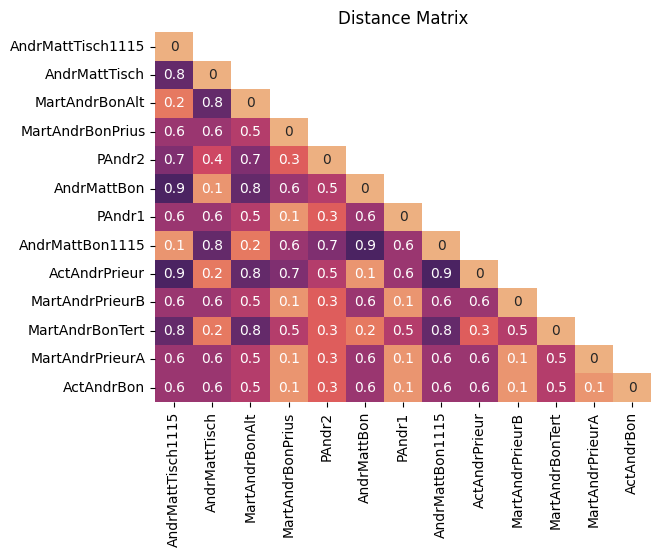

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


matrix_mask = np.triu(distance_matrix)


fig, ax = plt.subplots(nrows=1, ncols=1)


plot_distance_matrix(ax, pd.DataFrame(distance_matrix,
                    index=list(full_lemmatized_content.keys()),
                    columns=list(full_lemmatized_content.keys())).apply(lambda x: round(x, 1)),
                    cbar=False, annot=True, fmt='g', mask=matrix_mask)